# Find the closest FDM points to ice cores from QGreenland and firn cores collected in sumup

In [3]:
from scipy.spatial.distance import cdist
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [6]:
# import FDM locations

path_to_fdm_locations = "/perm/nld4814/code/IMAU-FDM/reference/FGRN055/"
df_

# import ice core locations from QGreenland

path_to_qgreenland = "/perm/nld4814/cores/qgreenland/"
df_qg = gpd.read_file(path_to_qgreenland+"ice_cores.geojson")

# import sumup locations

path_to_SUMup_folder = '/perm/nld4814/cores/sumup/'
df_density = xr.open_dataset(
    path_to_SUMup_folder+'data/SUMup_2024_density_greenland.nc',
    group='DATA').to_dataframe()

ds_meta = xr.open_dataset(
    path_to_SUMup_folder + 'data/SUMup_2024_density_greenland.nc',
    group='METADATA')

# more elegant decoding
for v in ['profile','reference','reference_short','method']:
    ds_meta[v] = ds_meta[v].str.decode('utf-8')

# ds_meta contain the meaning of profile_key, reference_key, method_key being
# used in df_density

# % creating a metadata frame
# that contains, for each unique location, the important information
# (lat/lon, reference...)
df_meta = df_density[
    ['profile_key','latitude','longitude','timestamp','reference_key','method_key']
    ].drop_duplicates()

df_meta['profile_name'] = ds_meta.profile.sel(profile_key= df_meta.profile_key.values)
df_meta['method'] = ds_meta.method.sel(method_key= df_meta.method_key.values)
df_meta['reference'] = ds_meta.reference.sel(reference_key= df_meta.reference_key.values)
df_meta['reference_short'] = ds_meta.reference_short.sel(reference_key= df_meta.reference_key.values)
df_meta = df_meta.set_index('profile_key')



In [77]:
idx=50
df_qg.iloc[idx].description

'\n     \n<table><tr><td>NETWORK: ICE CORES</td></tr><tr><td>INVESTIGATOR: PETRENKO, V.V.</td></tr><tr><td>LATITUDE: 72.57963</td></tr><tr><td>LONGITUDE: -38.49253</td></tr><tr><td>STUDY NAME: SUMMIT, GREENLAND FIRN COSMOGENIC 14CH4 DATA</td></tr><tr><td></td></tr><tr><td><a href="https://www.ncdc.noaa.gov/paleo-search/study/12256?siteId=52442">Access Data</a></td></tr></table>    \n'

In [80]:
df_qg.iloc[0].Name

' GRIP '

In [82]:
#make new xarray

idxs = np.zeros(shape=1,len(df_qg))
labels = []
lats = []
lons = []

for idx in range(0,len(df_qg)):
    #find lat
    idx_start_lat = df_qg.iloc[idx].description.find("LATITUDE") + 10
    idx_end = df_qg.iloc[idx].description[idx_start_lat:idx_start_lat+20].find("<")
    idx_end_lat = idx_start_lat+idx_end
    lat = df_qg.iloc[idx].description[idx_start_lat:idx_end_lat]
    
    #find lon
    idx_start_lon = df_qg.iloc[idx].description.find("LONGITUDE") + 11
    idx_end = df_qg.iloc[idx].description[idx_start_lon:idx_start_lon+20].find("<")
    idx_end_lon = idx_start_lon+idx_end
    lon = df_qg.iloc[idx].description[idx_start_lon:idx_end_lon]

    idxs = idxs.append(idx)
    labels = labels.append(df_qg.iloc[idx].Name)
    lats = lats.append(lat)
    lons = lons.append(lon)
    print(idx,lat,lon)


SyntaxError: positional argument follows keyword argument (1057805186.py, line 3)

In [70]:
df_qg.iloc[20].description[1:idx_end_lon]

'     \n<table><tr><td>NETWORK: ICE CORES</td></tr><tr><td>INVESTIGATOR: GRACHEV, A.M.</td></tr><tr><td>LATITUDE: 72.6</td></tr><tr><td>LONGITUDE: -38.5'

<Axes: >

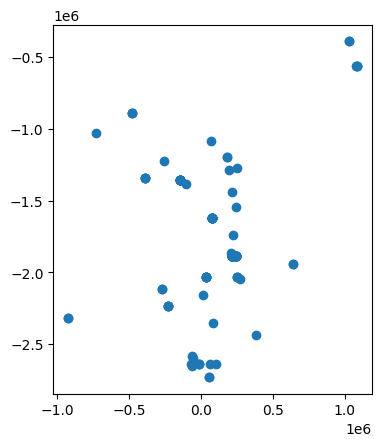

In [46]:
df_qg.plot()